### ***Step 1: Mounting Google Drive***
* Mount Google Drive to access datasets and save outputs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imported pandas lib for data manipulation and analysis.
import pandas as pd

# Imported PlotlyExpress for easier plotting of charts and visualizations.
import plotly.express as Plex

# Imported NumPy for numerical operations.
import numpy as np

# Imported to categorical from Keras for encodinglabels as one-hot-vectors(typicallyused for classificationtasks).
from keras.utils import to_categorical

# Imported LinearRegression from sklearn to performlinear regressionanalysis(a type of regressionmodel).
from sklearn.linear_model import LinearRegression

# Imported graph_objects from Plotly for creating more customizable and advancedplots.
import plotly.graph_objects as go

# Imported metrics like meansquaredlogerror and meanabsoluteerror from sklearn to evaluate model performance.
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

### ***Step 2: Data Preparation and Merging for Favorita Grocery Sales Forecasting***
This process involves preparing and merging datasets for a sales forecasting project using the Corporación Favorita dataset. Here's a step-by-step explanation:

* Dataset Paths and Loading:

Paths to all required CSV files are specified.
Datasets (holidays_events, items, oil, stores, transactions, train, and test) are read using pd.read_csv.

* Handling Data Types:

The onpromotion column in the train dataset is explicitly read as a string (dtype={'onpromotion': str}) to address potential mixed-type issues.
Datetime Conversion:

Date columns across datasets are converted to datetime format for consistency and ease of filtering.

* Filling Missing Oil Prices:

Missing values in the dcoilwtico column of the oil dataset are forward-filled using .ffill() to ensure no gaps in data.

* Date Range Filtering:

Defined specific date ranges for training, validation, and test sets:
Train: March 1, 2017, to June 21, 2017.
Validation: June 28, 2017, to July 13, 2017.
Test: July 19, 2017, to July 23, 2017.
Filtered the train dataset into corresponding subsets using these ranges.

* Merging Datasets:

A function merge_datasets is created to join datasets (stores, items, oil, holidays_events, transactions) with the main data (train, validation, or test) using relevant keys.
Merges are performed on shared columns like store_nbr, item_nbr, and date.

* Resultant Dataset Shapes:

Printed the shapes of the merged datasets for training, validation, and test subsets to verify the merges.

In [ ]:
# Creating a directory called 'dataset'
!mkdir 'dataset'

In [ ]:
# Verify the directory was created
!ls -l

total 12
drwxr-xr-x 2 root root 4096 Jan  3 16:25 dataset
drwx------ 6 root root 4096 Jan  3 16:25 drive
drwxr-xr-x 1 root root 4096 Dec 19 14:16 sample_data


In [ ]:
%cd 'dataset'
!unzip '/content/drive/MyDrive/project/favorita-grocery-sales-forecasting'

/content/dataset
Archive:  /content/drive/MyDrive/project/favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     


In [ ]:
import os
# Paths to the .csv files
datasets_paths = {
    'holidays_events': '/content/drive/MyDrive/project/holidays_events.csv',
    'items': '/content/drive/MyDrive/project/items.csv',
    'oil': '/content/drive/MyDrive/project/oil.csv',
    'sample_submission': '/content/drive/MyDrive/project/sample_submission.csv',
    'stores': '/content/drive/MyDrive/project/stores.csv',
    'train': '/content/drive/MyDrive/project/train.csv',
    'test': '/content/drive/MyDrive/project/test.csv',
    'transactions': '/content/drive/MyDrive/project/transactions.csv'
}

In [ ]:
# Read the datasets directly using pd.read_csv
holidays_events = pd.read_csv(datasets_paths['holidays_events'], encoding='ISO-8859-1')
items = pd.read_csv(datasets_paths['items'], encoding='ISO-8859-1')
oil = pd.read_csv(datasets_paths['oil'], encoding='ISO-8859-1')
sample_submission = pd.read_csv(datasets_paths['sample_submission'], encoding='ISO-8859-1')
stores = pd.read_csv(datasets_paths['stores'], encoding='ISO-8859-1')

# Specify dtype to handle mixed types
train = pd.read_csv(datasets_paths['train'], encoding='ISO-8859-1', dtype={'onpromotion': str})
test = pd.read_csv(datasets_paths['test'], encoding='ISO-8859-1')
transactions = pd.read_csv(datasets_paths['transactions'], encoding='ISO-8859-1')

In [ ]:
# Convert 'date' columns to datetime format
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [ ]:
# Use ffill() instead of fillna(method='ffill')
oil['dcoilwtico'] = oil['dcoilwtico'].ffill()

In [ ]:
# # Define date ranges for filtering
train_start_date = '2017-03-01'
train_end_date = '2017-06-21'
validation_start_date = '2017-06-28'
validation_end_date = '2017-07-13'
test_start_date = '2017-07-19'
test_end_date = '2017-07-23'

In [ ]:
# Filter train dataset by date ranges
train_filtered = train[(train['date'] >= train_start_date) & (train['date'] <= train_end_date)]
validation_filtered = train[(train['date'] >= validation_start_date) & (train['date'] <= validation_end_date)]
test_filtered = train[(train['date'] >= test_start_date) & (train['date'] <= test_end_date)]

In [ ]:
# Merge datasets with stores, items, oil, holidays, and transactions based on date
def merge_datasets(data):
     # Merge with stores and items
     data = data.merge(stores, on='store_nbr', how='left')
     data = data.merge(items, on='item_nbr', how='left')
     data = data.merge(oil, on='date', how='left')
     data = data.merge(holidays_events, on='date', how='left')
     data = data.merge(transactions, on=['date', 'store_nbr'], how='left')
     return data

In [ ]:
# Apply merging
TrainSetData = merge_datasets(train_filtered)
ValidationSetData = merge_datasets(validation_filtered)
TestSetData = merge_datasets(test_filtered)

In [ ]:
# Print the shapes of the merged datasets
print(f"Merged training dataset shape: {TrainSetData.shape}")
print(f"Merged validation dataset shape: {ValidationSetData.shape}")
print(f"Merged test dataset shape: {TestSetData.shape}")

Merged training dataset shape: (12051403, 20)
Merged validation dataset shape: (1807983, 20)
Merged test dataset shape: (523365, 20)


In [ ]:
print("Shape of TrainSetData     :", TrainSetData.shape)
print("Shape of ValidationSetData:", ValidationSetData.shape)
print("Shape of TestSetData      :", TestSetData.shape)

Shape of TrainSetData     : (12051403, 20)
Shape of ValidationSetData: (1807983, 20)
Shape of TestSetData      : (523365, 20)


In [ ]:
def check_null_values(df, df_name):
    # Printed the name of the DataFrame being analyzed
    print(f"\nNull value counts for {df_name}:")

    # Calculate the number of nullvalues for each column
    null_counts = df.isnull().sum()

    # Filter and display only columns with nullvalues
    print(null_counts[null_counts > 0])

# Call the function to checknull values in the trainingdataset
check_null_values(TrainSetData, "TrainSetData")

# Call the function to checknull values in the validationdataset
check_null_values(ValidationSetData, "ValidationSetData")

# Call the function to checknull values in the testdataset
check_null_values(TestSetData, "TestSetData")


Null value counts for TrainSetData:
dcoilwtico      3601003
type_y         10661224
locale         10661224
locale_name    10661224
description    10661224
transferred    10661224
dtype: int64

Null value counts for ValidationSetData:
dcoilwtico      460120
type_y         1589503
locale         1589503
locale_name    1589503
description    1589503
transferred    1589503
dtype: int64

Null value counts for TestSetData:
dcoilwtico     220077
type_y         413078
locale         413078
locale_name    413078
description    413078
transferred    413078
dtype: int64


### ***Step 3: Check Data Integrity***
Check for null values in the datasets and handle them by filling with the mode or other strategies.


In [ ]:
# Set the recommended pandasoption to opt into futurebehavior
pd.set_option('future.no_silent_downcasting', True)

# Fill NaN values with the mode and infer object types
TrainSetData = TrainSetData.fillna(TrainSetData.mode().iloc[0]).infer_objects(copy=False)
ValidationSetData = ValidationSetData.fillna(ValidationSetData.mode().iloc[0]).infer_objects(copy=False)
TestSetData = TestSetData.fillna(TestSetData.mode().iloc[0]).infer_objects(copy=False)

### ***Step 4: Data Overview***
* Display the shape of datasets.
* Use .info() to inspect data types and non-null counts.
* Use .describe() for statistical summaries.

In [ ]:
# Print the shapes of the reduced datasets
print(f"TrainingSet dataset shape  : {TrainSetData.shape}")
print(f"ValidationSet dataset shape: {ValidationSetData.shape}")
print(f"TestSet dataset shape      : {TestSetData.shape}")

TrainingSet dataset shape  : (12051403, 20)
ValidationSet dataset shape: (1807983, 20)
TestSet dataset shape      : (523365, 20)


In [ ]:
def check_null_values(df, df_name):

    # Display the header indicating which DataFrame is being checked
    print(f"\nNull value counts for {df_name}:")

    # Calculate the total number of null values for each column in the DataFrame
    null_counts = df.isnull().sum()

    # Filter out columns with no null values and print those with null values
    print(null_counts[null_counts > 0])


# Check and display null values for the training dataset
check_null_values(TrainSetData, "TrainSetData")

# Check and display null values for the validation dataset
check_null_values(ValidationSetData, "ValidationSetData")

# Check and display null values for the test dataset
check_null_values(TestSetData, "TestSetData")


Null value counts for TrainSetData:
Series([], dtype: int64)

Null value counts for ValidationSetData:
Series([], dtype: int64)

Null value counts for TestSetData:
Series([], dtype: int64)


In [ ]:
TrainSetData.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,107758056,2017-03-01,1,105574,10.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,53.82,Holiday,National,Ecuador,Fundacion de Cuenca,False,1873
1,107758057,2017-03-01,1,105575,18.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,53.82,Holiday,National,Ecuador,Fundacion de Cuenca,False,1873
2,107758058,2017-03-01,1,105737,3.0,False,Quito,Pichincha,D,13,GROCERY I,1044,0,53.82,Holiday,National,Ecuador,Fundacion de Cuenca,False,1873
3,107758059,2017-03-01,1,106716,2.0,False,Quito,Pichincha,D,13,GROCERY I,1032,0,53.82,Holiday,National,Ecuador,Fundacion de Cuenca,False,1873
4,107758060,2017-03-01,1,108698,6.0,False,Quito,Pichincha,D,13,DELI,2644,1,53.82,Holiday,National,Ecuador,Fundacion de Cuenca,False,1873


In [ ]:
TrainSetData.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
12051398,119707611,2017-06-21,54,2088922,3.0,False,El Carmen,Manabi,C,3,GROCERY I,1076,0,42.48,Holiday,National,Ecuador,Fundacion de Cuenca,False,658
12051399,119707612,2017-06-21,54,2089036,1.0,False,El Carmen,Manabi,C,3,GROCERY I,1034,0,42.48,Holiday,National,Ecuador,Fundacion de Cuenca,False,658
12051400,119707613,2017-06-21,54,2089339,5.0,False,El Carmen,Manabi,C,3,GROCERY I,1006,0,42.48,Holiday,National,Ecuador,Fundacion de Cuenca,False,658
12051401,119707614,2017-06-21,54,2103250,2.0,True,El Carmen,Manabi,C,3,BEAUTY,4254,0,42.48,Holiday,National,Ecuador,Fundacion de Cuenca,False,658
12051402,119707615,2017-06-21,54,2106464,1.0,True,El Carmen,Manabi,C,3,BEVERAGES,1148,0,42.48,Holiday,National,Ecuador,Fundacion de Cuenca,False,658


In [ ]:
ValidationSetData.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,120336876,2017-06-28,1,99197,3.0,False,Quito,Pichincha,D,13,GROCERY I,1067,0,44.74,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1906
1,120336877,2017-06-28,1,103520,3.0,False,Quito,Pichincha,D,13,GROCERY I,1028,0,44.74,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1906
2,120336878,2017-06-28,1,105574,5.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,44.74,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1906
3,120336879,2017-06-28,1,105575,11.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,44.74,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1906
4,120336880,2017-06-28,1,105577,3.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,44.74,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1906


In [ ]:
ValidationSetData.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
1807978,122035614,2017-07-13,54,2088922,6.0,False,El Carmen,Manabi,C,3,GROCERY I,1076,0,46.06,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,683
1807979,122035615,2017-07-13,54,2089339,3.0,False,El Carmen,Manabi,C,3,GROCERY I,1006,0,46.06,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,683
1807980,122035616,2017-07-13,54,2106464,1.0,False,El Carmen,Manabi,C,3,BEVERAGES,1148,0,46.06,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,683
1807981,122035617,2017-07-13,54,2110456,13.0,False,El Carmen,Manabi,C,3,BEVERAGES,1120,0,46.06,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,683
1807982,122035618,2017-07-13,54,2113914,200.0,True,El Carmen,Manabi,C,3,CLEANING,3040,0,46.06,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,683


In [ ]:
TestSetData.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
0,122566434,2017-07-19,1,99197,2.0,False,Quito,Pichincha,D,13,GROCERY I,1067,0,47.1,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,1797
1,122566435,2017-07-19,1,103520,1.0,False,Quito,Pichincha,D,13,GROCERY I,1028,0,47.1,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,1797
2,122566436,2017-07-19,1,103665,3.0,False,Quito,Pichincha,D,13,BREAD/BAKERY,2712,1,47.1,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,1797
3,122566437,2017-07-19,1,105574,4.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,47.1,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,1797
4,122566438,2017-07-19,1,105575,12.0,False,Quito,Pichincha,D,13,GROCERY I,1045,0,47.1,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,1797


In [ ]:
TestSetData.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type_x,cluster,family,class,perishable,dcoilwtico,type_y,locale,locale_name,description,transferred,transactions
523360,123089794,2017-07-23,54,2106464,1.0,False,El Carmen,Manabi,C,3,BEVERAGES,1148,0,45.78,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,926
523361,123089795,2017-07-23,54,2108569,3.0,False,El Carmen,Manabi,C,3,GROCERY I,1086,0,45.78,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,926
523362,123089796,2017-07-23,54,2110456,179.0,False,El Carmen,Manabi,C,3,BEVERAGES,1120,0,45.78,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,926
523363,123089797,2017-07-23,54,2113343,1.0,False,El Carmen,Manabi,C,3,BEVERAGES,1114,0,45.78,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,926
523364,123089798,2017-07-23,54,2113914,3.0,True,El Carmen,Manabi,C,3,CLEANING,3040,0,45.78,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False,926


In [ ]:
TrainSetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051403 entries, 0 to 12051402
Data columns (total 20 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   item_nbr      int64         
 4   unit_sales    float64       
 5   onpromotion   object        
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  family        object        
 11  class         int64         
 12  perishable    int64         
 13  dcoilwtico    float64       
 14  type_y        object        
 15  locale        object        
 16  locale_name   object        
 17  description   object        
 18  transferred   bool          
 19  transactions  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(9)
memory usage: 1.7+ GB


In [ ]:
ValidationSetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807983 entries, 0 to 1807982
Data columns (total 20 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   item_nbr      int64         
 4   unit_sales    float64       
 5   onpromotion   object        
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  family        object        
 11  class         int64         
 12  perishable    int64         
 13  dcoilwtico    float64       
 14  type_y        object        
 15  locale        object        
 16  locale_name   object        
 17  description   object        
 18  transferred   bool          
 19  transactions  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(9)
memory usage: 263.8+ MB


In [ ]:
TestSetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523365 entries, 0 to 523364
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            523365 non-null  int64         
 1   date          523365 non-null  datetime64[ns]
 2   store_nbr     523365 non-null  int64         
 3   item_nbr      523365 non-null  int64         
 4   unit_sales    523365 non-null  float64       
 5   onpromotion   523365 non-null  object        
 6   city          523365 non-null  object        
 7   state         523365 non-null  object        
 8   type_x        523365 non-null  object        
 9   cluster       523365 non-null  int64         
 10  family        523365 non-null  object        
 11  class         523365 non-null  int64         
 12  perishable    523365 non-null  int64         
 13  dcoilwtico    523365 non-null  float64       
 14  type_y        523365 non-null  object        
 15  locale        523

In [ ]:
TrainSetData.describe().T

,count,mean,min,25%,50%,75%,max,std
id,12051403.0,113721809.591372,107758056.0,110770906.5,113681914.0,116694764.5,119707615.0,3437011.300258
date,12051403,2017-04-26 00:22:44.538088704,2017-03-01 00:00:00,2017-03-29 00:00:00,2017-04-26 00:00:00,2017-05-24 00:00:00,2017-06-21 00:00:00,NaN
store_nbr,12051403.0,27.95042,1.0,13.0,28.0,43.0,54.0,16.224377
item_nbr,12051403.0,1162065.435106,96995.0,691945.0,1178696.0,1501581.0,2112404.0,580617.056227
unit_sales,12051403.0,8.206965,-10002.0,2.0,4.0,8.0,17146.0,25.791239
cluster,12051403.0,8.687854,1.0,5.0,9.0,13.0,17.0,4.584365
class,12051403.0,1971.560939,1002.0,1058.0,1190.0,2708.0,7780.0,1200.181572
perishable,12051403.0,0.254538,0.0,0.0,0.0,1.0,1.0,0.435601
dcoilwtico,12051403.0,50.208992,42.48,47.95,50.3,53.19,53.82,2.905983
transactions,12051403.0,1854.260658,292.0,1159.0,1508.0,2287.0,6398.0,1016.058688


In [ ]:
ValidationSetData.describe().T

,count,mean,min,25%,50%,75%,max,std
id,1807983.0,121170946.217161,120336876.0,120788871.5,121131627.0,121583622.5,122035618.0,479216.307233
date,1807983,2017-07-05 06:54:00.950384640,2017-06-28 00:00:00,2017-07-02 00:00:00,2017-07-05 00:00:00,2017-07-09 00:00:00,2017-07-13 00:00:00,NaN
store_nbr,1807983.0,28.219968,1.0,13.0,29.0,44.0,54.0,16.315943
item_nbr,1807983.0,1167997.46919,96995.0,686036.0,1179580.0,1576313.0,2116416.0,586419.820723
unit_sales,1807983.0,8.138476,-274.0,2.0,4.0,8.0,7033.0,22.666561
cluster,1807983.0,8.711412,1.0,5.0,9.0,13.0,17.0,4.563887
class,1807983.0,1970.045519,1002.0,1056.0,1190.0,2708.0,7780.0,1197.425657
perishable,1807983.0,0.255825,0.0,0.0,0.0,1.0,1.0,0.436324
dcoilwtico,1807983.0,45.526751,44.25,45.06,46.02,46.02,46.06,0.618441
transactions,1807983.0,1851.102815,427.0,1147.0,1537.0,2281.0,5664.0,1005.681769


In [ ]:
TestSetData.describe().T

,count,mean,min,25%,50%,75%,max,std
id,523365.0,122828116.0,122566434.0,122697275.0,122828116.0,122958957.0,123089798.0,151082.606155
date,523365,2017-07-21 01:17:17.583331072,2017-07-19 00:00:00,2017-07-20 00:00:00,2017-07-21 00:00:00,2017-07-22 00:00:00,2017-07-23 00:00:00,NaN
store_nbr,523365.0,28.300473,1.0,13.0,29.0,44.0,54.0,16.353602
item_nbr,523365.0,1169200.1447,96995.0,686036.0,1209718.0,1576332.0,2127114.0,587435.337295
unit_sales,523365.0,8.017112,-23.0,2.0,4.0,8.0,5639.0,23.135861
cluster,523365.0,8.705173,1.0,5.0,9.0,13.0,17.0,4.567693
class,523365.0,1967.9299,1002.0,1058.0,1190.0,2702.0,7780.0,1194.758229
perishable,523365.0,0.258565,0.0,0.0,0.0,1.0,1.0,0.437847
dcoilwtico,523365.0,46.216643,45.78,45.78,45.78,46.73,47.1,0.564353
transactions,523365.0,1854.724968,474.0,1142.0,1517.0,2239.0,5294.0,1029.870174


# ***EDA: Exploratory Data Anlysis***

### ***Data Visualization***
Description: Analyze and visualize data to uncover patterns and trends.
* Unit Sales Over Time: Line plots for train, validation, and test datasets.
* Promotion Analysis: Bar charts for average unit sales based on promotion status.
* Sales by Item Family: Sunburst charts to visualize sales contributions by family.

In [ ]:
# Function to plot unit sales over time for a given dataset
def plot_sales_over_time(data, title):
    sales_time_series = data.groupby('date')['unit_sales'].sum().reset_index()
    fig = Plex.line(sales_time_series, x='date', y='unit_sales', title=title)
    fig.update_layout(xaxis_title='Date', yaxis_title='Total Unit Sales', xaxis_rangeslider_visible=True)
    fig.show()

# Plot each dataset
plot_sales_over_time(TrainSetData, 'Unit Sales Over Time (Train Data)')
plot_sales_over_time(ValidationSetData, 'Unit Sales Over Time (Validation Data)')
plot_sales_over_time(TestSetData, 'Unit Sales Over Time (Test Data)')

In [ ]:
# Function to plot average unit sales based on promotion status for a given dataset
def plot_promo_sales(data, title, color):
    promo_sales = data.groupby('onpromotion')['unit_sales'].mean().reset_index()
    fig = Plex.bar(promo_sales, x='onpromotion', y='unit_sales', title=title, color_discrete_sequence=[color])
    fig.update_layout(xaxis_title='On Promotion', yaxis_title='Average Unit Sales')
    fig.show()

# Plot each dataset with different colors
plot_promo_sales(TrainSetData, 'Average Unit Sales: Promotion vs No Promotion (Train Data)', 'blue')
plot_promo_sales(TestSetData, 'Average Unit Sales: Promotion vs No Promotion (Test Data)', 'green')
plot_promo_sales(ValidationSetData, 'Average Unit Sales: Promotion vs No Promotion (Validation Data)', 'red')

In [ ]:
# Function to plot unit sales by family in a sunburst chart for a given dataset
def plot_sunburst_sales(data, title, color_sequence):
    sales_by_family = data.groupby(['family'])['unit_sales'].sum().reset_index()
    fig = Plex.sunburst(sales_by_family, path=['family'], values='unit_sales', title=title, color_discrete_sequence=color_sequence)
    fig.show()

# Plot each dataset with different color sequences
plot_sunburst_sales(TrainSetData, 'Unit Sales by Item Family(TrainData)', Plex.colors.qualitative.Pastel)
plot_sunburst_sales(TestSetData, 'Unit Sales by Item Family(TestData)', Plex.colors.qualitative.Vivid)
plot_sunburst_sales(ValidationSetData, 'Unit Sales by Item Family(ValidationData)', Plex.colors.qualitative.Prism)

Step 12: Advanced Visualizations
Actions:
* Create sunburst charts for sales by city and family.
* Analyze trends in specific item families or cities.

In [ ]:
# Function to plot unit sales by city and family in a sunburst chart for a given dataset
def plot_sunburst_sales(data, title, color_sequence):
    sales_by_city_family = data.groupby(['city', 'family'])['unit_sales'].sum().reset_index()
    fig = Plex.sunburst(sales_by_city_family, path=['city', 'family'], values='unit_sales', title=title, color_discrete_sequence=color_sequence)
    fig.show()

# Plot each dataset with different color sequences
plot_sunburst_sales(TrainSetData, 'Unit Sales by City and Item Family (Train Data)', Plex.colors.qualitative.Pastel)
plot_sunburst_sales(TestSetData, 'Unit Sales by City and Item Family (Test Data)', Plex.colors.qualitative.Vivid)
plot_sunburst_sales(ValidationSetData, 'Unit Sales by City and Item Family (Validation Data)', Plex.colors.qualitative.Prism)

In [ ]:
# Function to plot top 10 cities by total unit sales in a horizontal bar chart
def plot_top_cities_sales(data, title, color):
    sales_by_city = data.groupby('city')['unit_sales'].sum().sort_values(ascending=False).head(10).reset_index()
    fig = Plex.bar(sales_by_city, x='unit_sales', y='city', title=title, orientation='h', color_discrete_sequence=[color])
    fig.update_layout(xaxis_title='Total Unit Sales', yaxis_title='City')
    fig.show()

# Plot each dataset with different colors
plot_top_cities_sales(TrainSetData, 'Top 10 Cities by Total Unit Sales (Train Data)', 'blue')
plot_top_cities_sales(TestSetData, 'Top 10 Cities by Total Unit Sales (Test Data)', 'green')
plot_top_cities_sales(ValidationSetData, 'Top 10 Cities by Total Unit Sales (Validation Data)', 'red')

In [ ]:
# Function to plot unit sales by family and class in a treemap chart for a given dataset
def plot_treemap_sales(data, title, color_sequence):
    sales_by_family_class = data.groupby(['family', 'type_y'])['unit_sales'].sum().reset_index()
    fig = Plex.treemap(sales_by_family_class, path=['family', 'type_y'], values='unit_sales', title=title, color_discrete_sequence=color_sequence)
    fig.show()

# Plot each dataset with different color sequences
plot_treemap_sales(TrainSetData, 'Treemap of Unit Sales by Item Family and Class (Train Data)', Plex.colors.qualitative.Pastel)
plot_treemap_sales(TestSetData, 'Treemap of Unit Sales by Item Family and Class (Test Data)', Plex.colors.qualitative.Vivid)
plot_treemap_sales(ValidationSetData, 'Treemap of Unit Sales by Item Family and Class (Validation Data)', Plex.colors.qualitative.Prism)

In [ ]:
# Function to plot unit sales by family and city in a treemap chart for a given dataset
def plot_treemap_sales(data, title, color_sequence):
    sales_by_family_city = data.groupby(['family', 'city'])['unit_sales'].sum().reset_index()
    fig = Plex.treemap(sales_by_family_city, path=['family', 'city'], values='unit_sales', title=title, color_discrete_sequence=color_sequence)
    fig.show()

# Plot each dataset with different color sequences
plot_treemap_sales(TrainSetData, 'Treemap of Unit Sales by Item Family and City (Train Data)', Plex.colors.qualitative.Pastel)
plot_treemap_sales(TestSetData, 'Treemap of Unit Sales by Item Family and City (Test Data)', Plex.colors.qualitative.Vivid)
plot_treemap_sales(ValidationSetData, 'Treemap of Unit Sales by Item Family and City (Validation Data)', Plex.colors.qualitative.Prism)

In [ ]:
# Function to plot unit sales by city and store type in a stacked bar chart for a given dataset
def plot_sales_by_city_type(data, title, color_sequence):
    sales_by_city_type = data.groupby(['city', 'type_x'])['unit_sales'].sum().reset_index()
    fig = Plex.bar(sales_by_city_type, x='city', y='unit_sales', color='type_x',
                 title=title, barmode='stack', color_discrete_sequence=color_sequence)
    fig.update_layout(xaxis_title='City', yaxis_title='Total Unit Sales')
    fig.show()

# Plot each dataset with different color sequences
plot_sales_by_city_type(TrainSetData, 'Total Unit Sales by City and Store Type (Train Data)', Plex.colors.qualitative.Pastel)
plot_sales_by_city_type(TestSetData, 'Total Unit Sales by City and Store Type (Test Data)', Plex.colors.qualitative.Vivid)
plot_sales_by_city_type(ValidationSetData, 'Total Unit Sales by City and Store Type (Validation Data)', Plex.colors.qualitative.Prism)

In [ ]:
# Function to plot a bubble chart of unit sales by store number and city for a given dataset
def plot_bubble_chart(data, title):
    store_sales = data.groupby(['store_nbr', 'city'])['unit_sales'].sum().reset_index()
    fig = Plex.scatter(store_sales, x='store_nbr', y='city', size='unit_sales',
                     title=title,
                     labels={'store_nbr': 'Store Number', 'city': 'City', 'unit_sales': 'Total Unit Sales'},
                     hover_name='city')  # Adding city name to hover for better context
    fig.update_layout(xaxis_title='Store Number', yaxis_title='City')
    fig.show()

# Plot each dataset
plot_bubble_chart(TrainSetData, 'Bubble Chart of Unit Sales by Store Location (Train Data)')
plot_bubble_chart(TestSetData, 'Bubble Chart of Unit Sales by Store Location (Test Data)')
plot_bubble_chart(ValidationSetData, 'Bubble Chart of Unit Sales by Store Location (Validation Data)')

### ***Group By Date for Time Series Aggregation***

In [ ]:
train_time_series = TrainSetData.groupby('date')['unit_sales'].sum().reset_index()
validation_time_series = ValidationSetData.groupby('date')['unit_sales'].sum().reset_index()
test_time_series = TestSetData.groupby('date')['unit_sales'].sum().reset_index()

In [ ]:
train_time_series

,date,unit_sales
0,2017-03-01,1008521.710
1,2017-03-02,836225.179
2,2017-03-03,882639.775
3,2017-03-04,1125736.347
4,2017-03-05,1196983.690
...,...,...
108,2017-06-17,1096133.551
109,2017-06-18,965144.121
110,2017-06-19,791146.394
111,2017-06-20,787326.717


In [ ]:
validation_time_series

,date,unit_sales
0,2017-06-28,731896.985
1,2017-06-29,630811.803
2,2017-06-30,802273.139
3,2017-07-01,1207529.922
4,2017-07-02,1296379.217
5,2017-07-03,1850286.818
6,2017-07-04,832359.286
7,2017-07-05,844301.613
8,2017-07-06,700272.010
9,2017-07-07,805792.302


In [ ]:
test_time_series

,date,unit_sales
0,2017-07-19,767978.778
1,2017-07-20,688288.068
2,2017-07-21,782418.299
3,2017-07-22,932902.047
4,2017-07-23,1024288.741


### ***Convert Date Column to Datetime and Set as Index for Time Series Data***

In [ ]:
# Convert the 'date' column in the training time series data to a datetime object
train_time_series['date'] = pd.to_datetime(train_time_series['date'])

# Set the 'date' column as the index for the training time series data
train_time_series = train_time_series.set_index('date')

# Convert the 'date' column in the test time series data to a datetime object
test_time_series['date'] = pd.to_datetime(test_time_series['date'])

# Set the 'date' column as the index for the test time series data
test_time_series = test_time_series.set_index('date')

# Convert the 'date' column in the validation time series data to a datetime object
validation_time_series['date'] = pd.to_datetime(validation_time_series['date'])

# Seted the 'date' column as the index for the validation time series data
validation_time_series = validation_time_series.set_index('date')

### ***Standardize Time Series Data Using StandardScaler***

In [ ]:
from sklearn.preprocessing import StandardScaler

#Assuming 'unit_sales' is the column you want to normalize
scaler = StandardScaler()

# Adjust the scaler using the training set.
train_scaled = scaler.fit_transform(train_time_series[['unit_sales']])

#The same scaler should be used to transform the test and validation data.
validation_scaled = scaler.transform(validation_time_series[['unit_sales']])
test_scaled = scaler.transform(test_time_series[['unit_sales']])

#Return to DataFrames the scaled data (optional)
train_scaled_df = pd.DataFrame(train_scaled, columns=['unit_sales'], index=train_time_series.index)
validation_scaled_df = pd.DataFrame(validation_scaled, columns=['unit_sales'], index=validation_time_series.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=['unit_sales'], index=test_time_series.index)

#train_scaled_df, validation_scaled_df, and test_scaled_df are now available.
#For additional modeling or processing
print(train_scaled_df.head())
print(validation_scaled_df.head())
print(test_scaled_df.head())

            unit_sales
date                  
2017-03-01    0.726178
2017-03-02   -0.212777
2017-03-03    0.040166
2017-03-04    1.364956
2017-03-05    1.753229
            unit_sales
date                  
2017-06-28   -0.781329
2017-06-29   -1.332208
2017-06-30   -0.397804
2017-07-01    1.810702
2017-07-02    2.294899
            unit_sales
date                  
2017-07-19   -0.584696
2017-07-20   -1.018982
2017-07-21   -0.506006
2017-07-22    0.314077
2017-07-23    0.812102


### ***Create Sliding Window Dataset for Time Series Forecasting***

In [ ]:
def create_sliding_window_dataset(data, window_size):

    X = []  # List to store featurewindows
    y = []  # List to store targetvalues

    # Loop through the data, creating slidingwindows
    for i in range(len(data) - window_size):
        # Append a window of 'unit_sales' values as features
        X.append(data.iloc[i:i + window_size]['unit_sales'].values)
        # Append the next 'unit_sales' value as the target
        y.append(data.iloc[i + window_size]['unit_sales'])

    # Convert lists to NumPyarrays for machinelearning compatibility
    return np.array(X), np.array(y)


# Define the size of the slidingwindow
window_size = 4

# Create sliding window datasets for trainingset, validationset, and testingsets
X_trn, y_trn = create_sliding_window_dataset(train_scaled_df, window_size)
X_val, y_val = create_sliding_window_dataset(validation_scaled_df, window_size)
X_tst, y_tst = create_sliding_window_dataset(test_scaled_df, window_size)

# Print the shapes of the feature and target datasets to verify
print("X_trn shape:", X_trn.shape)  # Shape of trainingfeatures
print("y_trn shape:", y_trn.shape)  # Shape of trainingtargets
print("X_val shape:", X_val.shape)  # Shape of validationfeatures
print("y_val shape:", y_val.shape)  # Shape of validationtargets
print("X_tst shape:", X_tst.shape)  # Shape of testingfeatures
print("y_tst shape:", y_tst.shape)  # Shape of testingtargets

X_trn shape: (109, 4)
y_trn shape: (109,)
X_val shape: (12, 4)
y_val shape: (12,)
X_tst shape: (1, 4)
y_tst shape: (1,)


### ***Reshape Data for LSTM or CNN Model Input***

In [ ]:
# Reshape the training data to add a third dimension
# The new shape will be (number of samples, window size, 1)
X_train_re = X_trn.reshape(X_trn.shape[0], X_trn.shape[1], 1)

# Reshape the validation data to add a third dimension
# This is needed for compatibility with models like LSTMs or CNNs that expect 3D input
X_val_re = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Reshape the test data to add a third dimension
# The third dimension typically represents features per time step
X_test_re = X_tst.reshape(X_tst.shape[0], X_tst.shape[1], 1)

### ***One-Hot Encode Target Variables for Classification***

In [ ]:
# Convert the trainingtarget data into one-hot encoded format
# `to_categorical` transforms integer labels into a binary matrix representation
y_train1 = to_categorical(y_trn)

# Convert the validationtarget data into one-hot encoded format
y_val1 = to_categorical(y_val)

# Convert the testtarget data into one-hot encoded format
y_test1 = to_categorical(y_tst)

In [ ]:
print("y_train1 shape:", y_train1.shape)
print("y_val1 shape  :", y_val1.shape)
print("y_test1 shape :", y_test1.shape)

y_train1 shape: (109, 4)
y_val1 shape  : (12, 6)
y_test1 shape : (1, 1)


# ***Model DL: Graph Neural Network(GNN) with CNN Layers***

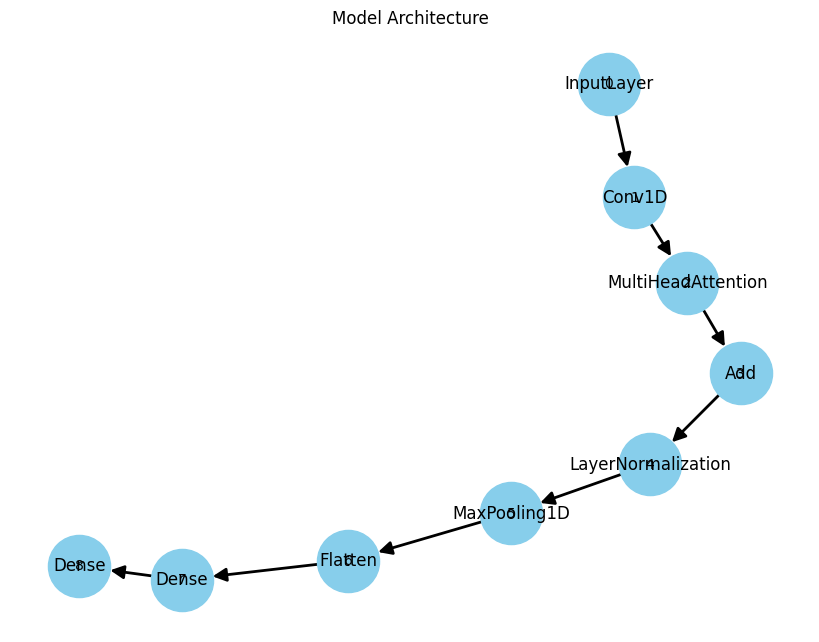

In [ ]:
# Import TensorFlow and Keras modules for building the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Import Matplotlib for visualization
import matplotlib.pyplot as PLted

# Import NetworkX for graph-based visualization of model architecture
import networkx as nx

# Define the GNN-based model
def GNN_Model(input_shape):
    """
    Builds a neuralnetwork model with convolutional and attentionlayers.

    Args:
    input_shape(tuple): The shape of the inputdata.

    Returns:
    keras.Model: A compiled Kerasmodel.
    """
    # Define the input layer with the specifiedshape
    inputs = keras.Input(shape=input_shape)

    # Add a 1D convolutional layer for feature extraction with ReLUactivation
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)

    # Add a multihead attentionlayer to capture dependencies in the sequence
    attention = layers.MultiHeadAttention(num_heads=8, key_dim=64)(x, x)

    # Add a residual connection and combine it with the attention output
    x = layers.Add()([x, attention])

    # Normalize the output using LayerNormalization
    x = layers.LayerNormalization()(x)

    # Add a max poolinglayer to reduce the dimensionality of the sequence
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Flatten the output to prepare it for dense layers
    x = layers.Flatten()(x)

    # Add a dense layer with 50 units and ReLU activation
    x = layers.Dense(50, activation='relu')(x)

    # Add the final dense layer with 1 unit (for regressiontasks)
    outputs = layers.Dense(1)(x)

    # Create the Keras model with defined inputs and outputs
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer='adam', loss='mse')

    # Return the compiled model
    return model

# Specify the input shape for the model based on training data
input_shape = (X_train_re.shape[1], 1)

# Initialize the GNN model
GNN_Model = GNN_Model(input_shape)

# Function to plot the architecture of the model as a graph
def plot_layer_architecture(model):
    """
    Plots a simplified layer architecture resembling a GNN using NetworkX.

    Args:
    model (keras.Model): The model whose architecture is to be visualized.
    """
    # Create a directed graph to represent the model's architecture
    G = nx.DiGraph()

    # Extract layer names from the model
    layer_names = [layer.__class__.__name__ for layer in model.layers]

    # Add nodes to the graph with layer indices and names
    for i, layer in enumerate(layer_names):
        G.add_node(i, label=layer)

    # Add directed edges between consecutive layers
    for i in range(len(layer_names) - 1):
        G.add_edge(i, i + 1)

    # Generate positions for nodes using a spring layout
    pos = nx.spring_layout(G)

    # Plot the graph using Matplotlib
    PLted.figure(figsize=(8, 6))
    nx.draw(
        G, pos, with_labels=True, node_size=2000, node_color="skyblue",
        font_size=10, font_color="black", width=2, arrowsize=20
    )

    # Add labels to the graph nodes
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels=labels)

    # Add a title to the plot
    PLted.title("Model Architecture")
    PLted.show()

# Plot the architecture of the GNN model
plot_layer_architecture(GNN_Model)

In [ ]:
# Compile the GNN model with the specified optimizer and loss function.
GNN_Model.compile(optimizer='adam', loss='mse')

# Train the GNN model using the training data.
# Parameters:
# - X_train_re: Input features for training.
# - y_trn: Target labels for training.
# - epochs=50: Number of complete passes through the trainingdataset.
# - batch_size=32: Number of samples per gradient update.
# - ValidationSetData=(X_val_re, y_val): Validationdata (features and labels) used for performance monitoring duringtraining.
GNN_Model.fit(X_train_re, y_trn, epochs=50, batch_size=32, validation_data=(X_val_re, y_val))

Epoch 1/50
4/4 [==============================] - 1s 80ms/step - loss: 1.6751 - val_loss: 2.1052
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 0.8247 - val_loss: 3.0406
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.7161 - val_loss: 3.3057
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6890 - val_loss: 2.9858
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 0.5207 - val_loss: 2.5516
Epoch 6/50
4/4 [==============================] - 0s 17ms/step - loss: 0.5134 - val_loss: 2.4042
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.4374 - val_loss: 2.9753
Epoch 8/50
4/4 [==============================] - 0s 25ms/step - loss: 0.4702 - val_loss: 2.9145
Epoch 9/50
4/4 [==============================] - 0s 22ms/step - loss: 0.3932 - val_loss: 2.5381
Epoch 10/50
4/4 [==============================] - 0s 17ms/step - loss: 0.3818 - val_loss: 2.5095
Epoch 11/50
4/4 [============

### ***Calculate RMSLE and RMALE for Deep Learning Model Evaluation***

In [ ]:
# Predict the output using the trained GNN model on the validation data.
y_predGNN = GNN_Model.predict(X_val_re)

# Inverse transform the predicted values to their original scale using the scaler.
# Reshaping the predictions to match the expected input shape for the scaler.
y_pred_GNN = scaler.inverse_transform(y_predGNN.reshape(-1, 1))

# Inverse transform the true values to their original scale using the scaler.
y_true_GNN = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate the RMSLE(RootMeanSquaredLogarithmic Error) between the true and predicted values.
# This metric is useful for regression tasks where the target values have a skewed distribution.
rmsle2 = np.sqrt(mean_squared_log_error(y_true_GNN, y_pred_GNN))

# Print the RMSLE result.
print("RMSLE:", rmsle2)

# Define a function to calculate the Mean Absolute Log Error (MALE) between the true and predicted values.
# MALE computes the average of the absolute differences between the log-transformed true and predicted values.
def mean_absolute_log_error(y_true, y_pred):
    """Calculate the Mean Absolute Log Error (MALE)."""
    return np.mean(np.abs(np.log(y_true + 1) - np.log(y_pred + 1)))

# Calculate the RMAL(RootMeanAbsolute LogError) between the true and predicted values.
rmale2 = np.sqrt(mean_absolute_log_error(y_true_GNN, y_pred_GNN))

# Print the RMAL result.
print("RMALE:", rmale2)

1/1 [==============================] - 0s 128ms/step
RMSLE: 0.25703170297875744
RMALE: 0.38336372611853287


### ***Deep Learning Model Prediction Visualize Actual vs Predicted Values with Plotly***

In [ ]:
# Import the plotly.graph_objects library to create interactive visualizations.
import plotly.graph_objects as go

# Create a new figure object for the plot.
fig = go.Figure()

# Add a trace for the actual values(truevalues), plotted as lines with markers.
# `y_true_GNN.flatten()` flattens the array to a 1D array for plotting.
fig.add_trace(go.Scatter(y=y_true_GNN.flatten(),
                         mode='lines+markers', name='Actual'))

# Add a trace for the predicted values, also plotted as lines with markers.
# `y_pred_GNN.flatten()` flattens the predicted array for plotting.
fig.add_trace(go.Scatter(y=y_pred_GNN.flatten(),
                         mode='lines+markers', name='Predicted'))

# Update the layout of the plot: setting titles for the plot and axes.
fig.update_layout(title='Actual vs. Predicted Values',
                  xaxis_title='Time Step',
                  yaxis_title='Sales')

# Display the figure with the added traces and layout settings.
fig.show()

### ***Future Sales Forecasting and Visualization for the Next 7 Days***

In [ ]:
# Reshape the last data point of the test set to match the input shape for prediction.
last_window = X_tst[-1].reshape(1, window_size, 1)

# Initialize an empty list to store the future predictions.
future_predictions = []

# Generate 7 future predictions.
for _ in range(7):
    # Predict the next value based on the last window.
    next_pred = GNN_Model.predict(last_window)

    # Extract the scalar value from the prediction.
    next_pred_scalar = next_pred.item()

    # Append the predicted value to the future predictions list.
    future_predictions.append(next_pred_scalar)

    # Roll the window of inputs (shift left by 1) to make space for the next prediction.
    last_window = np.roll(last_window, -1, axis=1)

    # Update the last value in the window with the predicted value.
    last_window[0, -1, 0] = next_pred_scalar

# Inverse transform the predictions to their original scale using the scaler.
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Get the last date from the test time series to start generating future dates.
last_date = test_time_series.index[-1]

# Generate the next 7 future dates starting from the day after the last date.
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=7)

# Create a DataFrame to store the future predictions along with their corresponding dates.
future_df = pd.DataFrame({'date': future_dates, 'unit_sales': future_predictions_inv.flatten()})

# Set the 'date' column as the index for the future predictions DataFrame.
future_df = future_df.set_index('date')

# Import plotly for visualization.
import plotly.graph_objects as go

# Create a new figure for the plot.
fig = go.Figure()

# Add a trace for the actual test data (unit_sales).
fig.add_trace(go.Scatter(
    x=test_time_series.index,
    y=test_time_series['unit_sales'],
    mode='lines',
    name='Test Data',
    line=dict(color='green', width=2)
))

# Create a line connecting the last point of the test data to the first prediction for continuity.
connected_dates = np.concatenate([test_time_series.index[-1:], future_df.index])
connected_sales = np.concatenate([test_time_series['unit_sales'].iloc[-1:], future_df['unit_sales'].iloc[:1]])

# Add this continuity line to the plot.
fig.add_trace(go.Scatter(
    x=connected_dates,
    y=connected_sales,
    mode='lines',
    showlegend=False,
    line=dict(color='green', dash='dot', width=2)  # Dashed line for continuity
))

# Add a trace for the future predictions.
fig.add_trace(go.Scatter(
    x=future_df.index,
    y=future_df['unit_sales'],
    mode='lines',
    name='Future Predictions',
    line=dict(color='orange', width=3, dash='dash')  # Dashed line for future predictions
))

# Customize the layout of the plot.
fig.update_layout(
    title='Future Sales Predictions (Next 7 Days)',  # Title of the plot
    xaxis_title='Date',  # Label for the x-axis
    yaxis_title='Unit Sales',  # Label for the y-axis
    template='plotly_dark',  # Dark background template for the plot
    plot_bgcolor='rgb(24, 24, 24)',  # Background color for the plot
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='rgba(255, 255, 255, 0.2)'),  # Gridlines for x-axis
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='rgba(255, 255, 255, 0.2)'),  # Gridlines for y-axis
    legend=dict(x=0.8, y=0.8, bgcolor='rgba(0, 0, 0, 0)')  # Position and style of the legend
)

# Display the plot.
fig.show()

1/1 [==============================] - 0s 24ms/step


# ***Model DL: Hybrid(CNN-LSTM-GRU)***

In [ ]:
# Import necessary libraries from TensorFlow and Keras for building the model.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, LSTM, GRU, Dense, Flatten, Input, MultiHeadAttention, LayerNormalization, Add
)
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# Define the input shape based on the trainingdata(number of time steps, features).
input_shape = (X_train_re.shape[1], 1)

# Define the input layer with the specified inputshape.
inputs = Input(shape=input_shape)

# Add a 1D convolutional layer with 64 filters, kernel size of 2, and ReLUactivation.
conv = Conv1D(filters=64, kernel_size=2, activation='relu')(inputs)

# Apply multi-head attention to the convolutional output, using 8-heads and key dimension matching the last dimension of the conv layer.
attention = MultiHeadAttention(num_heads=8, key_dim=conv.shape[-1])(conv, conv)

# Add the originalconvolutional outputback to the attentionoutput(residualconnection) and normalize the result.
attention = Add()([attention, conv])
attention = LayerNormalization()(attention)

# Add an LSTM layer with 50 units and ReLU activation, keeping the sequence output for the next layer.
lstm = LSTM(50, activation='relu', return_sequences=True)(attention)

# Add a GRU layer with 50 units and ReLU activation, returning only the last output (not a sequence).
gru = GRU(50, activation='relu')(lstm)

# Add a dense layer with 1 unit to produce the final output (scalar value for regression).
outputs = Dense(1)(gru)

# Create the model using the input and output layers.
model = Model(inputs, outputs)

# Compile the model using the Adam optimizer and mean squared error loss function.
model.compile(optimizer='adam', loss='mse')

# Train the model using the training data, specifying 50 epochs and a batch size of 32.
# Use validation data to monitor performance during training.
model.fit(X_train_re, y_trn, epochs=50, batch_size=32, validation_data=(X_val_re, y_val))

Epoch 1/50
4/4 [==============================] - 3s 156ms/step - loss: 0.8782 - val_loss: 2.8722
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.7238 - val_loss: 2.6487
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 0.6120 - val_loss: 2.6843
Epoch 4/50
4/4 [==============================] - 0s 31ms/step - loss: 0.5570 - val_loss: 2.4909
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 0.5561 - val_loss: 2.6527
Epoch 6/50
4/4 [==============================] - 0s 28ms/step - loss: 0.5210 - val_loss: 2.8048
Epoch 7/50
4/4 [==============================] - 0s 29ms/step - loss: 0.4757 - val_loss: 2.8110
Epoch 8/50
4/4 [==============================] - 0s 24ms/step - loss: 0.4876 - val_loss: 2.7386
Epoch 9/50
4/4 [==============================] - 0s 24ms/step - loss: 0.4416 - val_loss: 2.6298
Epoch 10/50
4/4 [==============================] - 0s 26ms/step - loss: 0.4425 - val_loss: 2.5799
Epoch 11/50
4/4 [===========

### ***Calculate RMSLE and RMALE for Deep Learning Model Evaluation***

In [ ]:
# Predict the output using the trained model on the validation data.
y_pred = model.predict(X_val_re)

# Inverse transform the predicted values to their original scale using the scaler.
# Reshaping the predictions to match the expected input shape for the scaler.
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Inverse transform the true values to their original scale using the scaler.
y_true_original = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true and predicted values.
# RMSLE is useful for regression tasks where the target values have a skewed distribution.
rmsle = np.sqrt(mean_squared_log_error(y_true_original, y_pred_original))

# Print the RMSLE result.
print("RMSLE:", rmsle)

# Define a function to calculate the Mean Absolute Log Error (MALE) between the true and predicted values.
# MALE computes the average of the absolute differences between the log-transformed true and predicted values.
def mean_absolute_log_error(y_true, y_pred):
    """Calculate the Mean Absolute Log Error (MALE)."""
    return np.mean(np.abs(np.log(y_true + 1) - np.log(y_pred + 1)))

# Calculate the RMAL(RootMeanAbsolute LogError) between the true and predicted values.
rmale = np.sqrt(mean_absolute_log_error(y_true_original, y_pred_original))

# Print the RMAL result.
print("RMALE:", rmale)

1/1 [==============================] - 0s 328ms/step
RMSLE: 0.2654204714134437
RMALE: 0.39306186604575233


### ***Visualize Actual vs Predicted Unit Sales with Plotly***

In [ ]:
# Create a new figure object for the plot.
fig = go.Figure()

# Add a trace for the actual values (true values) of unit sales.
# Flatten the array to a 1D array for plotting and display it as a line.
fig.add_trace(go.Scatter(y=y_true_original.flatten(),
                         mode='lines',  # Display as a line plot
                         name='Actual'))  # Label the trace as 'Actual'

# Add a trace for the predicted values (model predictions) of unit sales.
# Flatten the array to a 1D array for plotting and display it as a line.
fig.add_trace(go.Scatter(y=y_pred_original.flatten(),
                         mode='lines',  # Display as a line plot
                         name='Predicted'))  # Label the trace as 'Predicted'

# Update the layout of the plot: setting titles for the plot and axes.
fig.update_layout(title='Actual vs Predicted Values',  # Title of the plot
                  xaxis_title='Time Step',  # Label for the x-axis
                  yaxis_title='Unit Sales')  # Label for the y-axis

# Display the figure with the added traces and layout settings.
fig.show()

### ***Future Sales Forecasting and Visualization for the Next 7 Days***

In [ ]:
# Prepare the last window of test data (last_sequence) and reshape it to match the input format for the model.
last_window = X_tst[-1].reshape(1, window_size, 1)

# Initialize an empty list to store future predictions.
future_predictions = []

# Loop to generate future predictions (7 days in this case).
for _ in range(7):
    # Predict the next value using the model and the current last window.
    next_pred = model.predict(last_window)
    # Extract the scalar value from the prediction.
    next_pred_scalar = next_pred.item()
    # Append the prediction to the future predictions list.
    future_predictions.append(next_pred_scalar)
    # Roll the last window to prepare it for the next prediction (shift by 1 step).
    last_window = np.roll(last_window, -1, axis=1)
    # Replace the last value in the window with the predicted value.
    last_window[0, -1, 0] = next_pred_scalar

# Inverse transform the future predictions to the original scale using the scaler.
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Get the last date from the test time series.
last_date = test_time_series.index[-1]

# Generate future dates for the next 7 days starting from the last date.
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=7)

# Create a DataFrame for future predictions with dates and predicted unit sales.
future_df = pd.DataFrame({'date': future_dates, 'unit_sales': future_predictions_inv.flatten()})
# Set the 'date' column as the index for the future DataFrame.
future_df = future_df.set_index('date')

# Import Plotly for interactive plotting.
import plotly.graph_objects as go

# Create a figure for the plot.
fig = go.Figure()

# Add the actual test data to the plot as a green line.
fig.add_trace(go.Scatter(
    x=test_time_series.index,
    y=test_time_series['unit_sales'],
    mode='lines',
    name='Test Data',
    line=dict(color='green', width=2)  # Line style for test data
))

# Connect the last actual data point to the first future prediction with a dotted line.
connected_dates = np.concatenate([test_time_series.index[-1:], future_df.index])
connected_sales = np.concatenate([test_time_series['unit_sales'].iloc[-1:], future_df['unit_sales'].iloc[:1]])

# Add the dotted line for connecting the test data to future predictions.
fig.add_trace(go.Scatter(
    x=connected_dates,
    y=connected_sales,
    mode='lines',
    showlegend=False,
    line=dict(color='green', dash='dot', width=2)  # Dotted line style
))

# Add the future predictions to the plot as an orange dashed line.
fig.add_trace(go.Scatter(
    x=future_df.index,
    y=future_df['unit_sales'],
    mode='lines',
    name='Future Predictions',
    line=dict(color='orange', width=3, dash='dash')  # Dashed line style for future predictions
))

# Update the layout of the plot to customize titles, colors, grid lines, and legend positioning.
fig.update_layout(
    title='Future Sales Predictions (Next 7 Days)',  # Title of the plot
    xaxis_title='Date',  # Label for the x-axis
    yaxis_title='Unit Sales',  # Label for the y-axis
    template='plotly_dark',  # Dark theme for the plot
    plot_bgcolor='rgb(24, 24, 24)',  # Background color of the plot
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='rgba(255, 255, 255, 0.2)'),  # Gridlines for x-axis
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='rgba(255, 255, 255, 0.2)'),  # Gridlines for y-axis
    legend=dict(x=0.8, y=0.8, bgcolor='rgba(0, 0, 0, 0)')  # Positioning the legend
)

# Display the plot.
fig.show()

1/1 [==============================] - 0s 24ms/step


# ***Models Performance Comparesion***

In [ ]:
import plotly.graph_objects as go

# Sample data (replace with your actual RMSLE and RMALE values)
models = ['GNN', 'Hybrid']
rmsle_values = [rmsle2, rmsle]  # Replace with your actual RMSLE values
rmale_values = [rmale2, rmale]  # Replace with your actual RMALE values

# Create the plot
fig = go.Figure()

# Add RMSLE bars with text labels on top
fig.add_trace(go.Bar(x=models,
                     y=rmsle_values,
                     name='RMSLE',
                     text=rmsle_values,  # Display RMSLE values as text
                     textposition='outside'))  # Position text outside the bars

# Add RMALE bars with text labels on top
fig.add_trace(go.Bar(x=models,
                     y=rmale_values,
                     name='RMALE',
                     text=rmale_values,  # Display RMALE values as text
                     textposition='outside'))  # Position text outside the bars

# Update layout
fig.update_layout(
    title='Comparison of RMSLE and RMALE for Different Models',
    xaxis_title='Models',
    yaxis_title='Error Value',
    barmode='group'
)

# Show the plot
fig.show()

### ***Analysis:***
* RMSLE is slightly lower for the GNN model, indicating better performance in terms of squared logarithmic errors.
* RMALE is also lower for the GNN model, suggesting it has a smaller absolute logarithmic error on average compared to the Hybrid model.

### ***Conclusion:***
* The GNN model performs slightly better overall compared to the Hybrid model in both RMSLE and RMALE metrics.

### ***Comparison between Base and Proposed Code Results***

In [ ]:
import plotly.graph_objects as go

models = ['Base', 'Proposed']
rmsle_values = [0.5136, rmsle2]
rmale_values = [0.3245, rmale2]

fig = go.Figure()

fig.add_trace(go.Bar(x=models,
                     y=rmsle_values,
                     name='RMSLE',
                     text=rmsle_values,
                     textposition='outside'))

fig.add_trace(go.Bar(x=models,
                     y=rmale_values,
                     name='RMALE',
                     text=rmale_values,
                     textposition='outside'))

fig.update_layout(
    title='Comparison of RMSLE and RMALE for Different Models',
    xaxis_title='Models',
    yaxis_title='Error Value',
    barmode='group'
)

fig.show()

### ***Conclusion:***
* The Proposed Model performs better in terms of RMSLE, suggesting it reduces large logarithmic errors more effectively compared to the Base Model.